Fernando Cerriteño Magaña A01702790

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

Se checa que no existan varibales nulas

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Se quita la columna id debido a que no nos sirve para el modelo

In [ ]:
df.drop('Id',axis=1,inplace = True)

Se convierte la columna species a categorica para poder trabajar mejor con los datos

In [ ]:
df = df.astype({"Species":'category'})

In [ ]:
print('Descripción del dataset:')
print(df.describe())

Descripción del dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Se separan los datos con las caracteristicas

In [ ]:
X = np.array(df.drop(['Species'], 1))
y = np.array(df['Species'])

<ipython-input-58-d3e0260e6547>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Species'], 1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2> 1. Regresión logística

Formula:
\begin{align}
P(y=1 \mid x) = \frac{1}{1+e^{β_0+β_1x_1+β_2x_2}+...+β_nx_n}
\end{align}

Donde:


*  $P(y=1 \mid x)$ es la probabilidad condicional de que el evento ocurra dado el vector de variables independientes x.
*   $e$ es la base del logaritmo natural (aproximadamente 2.71828).
*   $β_0, β_1, β_2, ..., β_n$ son los coeficientes de regresión que se ajustan durante el proceso de entrenamiento del modelo.
*   $x_0, x_1, x_2, ..., x_n$ son los valores de las variables independientes.



In [ ]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)

In [ ]:
tabla=pd.DataFrame({'Real':y_test,'Prediccion':Y_pred,'Acerto':y_test==Y_pred})

In [ ]:
tabla

,Real,Prediccion,Acerto
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-virginica,Iris-virginica,True
3,Iris-setosa,Iris-setosa,True
4,Iris-versicolor,Iris-versicolor,True
5,Iris-virginica,Iris-virginica,True
6,Iris-virginica,Iris-virginica,True
7,Iris-setosa,Iris-setosa,True
8,Iris-setosa,Iris-setosa,True
9,Iris-versicolor,Iris-versicolor,True


In [ ]:
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.9583333333333334


Matriz de confusión

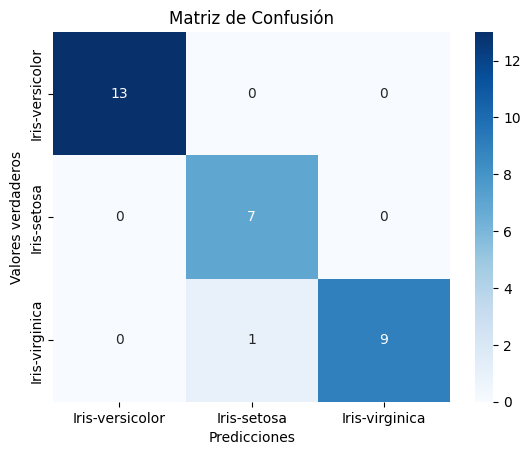

In [ ]:
conf_matrix = confusion_matrix(y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
class_names=['Iris-versicolor','Iris-setosa','Iris-virginica']
tick_marks=[0.5,1.5,2.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

<h2>2. Clasificacion Naive Bayes

Formula:


\begin{align}
P(C_k \mid x_1,x_2,...,x_n) = \frac{P(C_k)*P(x_1\mid C_k)*P(x_2\mid C_k)*...*P(x_n\mid C_n)}{P(x_1,x_2,...,x_n)}
\end{align}

Donde:

*  $P(C_k \mid x_1,x_2,...,x_n)$ es la probabilidad posterior de que la instancia pertenezca a la clase
$C_k$ dado el vector de características.
*  $P(C_k)$ es la probabilidad a priori de la clase $C_k$.
*  $P(x_i\mid C_k)$ es la probabilidad de observar la característica $x_i$ dado que la instancia pertenece a la clase $C_k$.
*  $P(x_1, x_2, ..., x_n)$ es la probabilidad de observar el vector de características $x_1, x_2, ..., x_n$.

Debido a que ya se cuenta con los datos preparados se pasa directamente al modelo

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predBayern=nb.predict(X_test)
print(y_predBayern)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [ ]:
tablaBayern=pd.DataFrame({'Real':y_test,'Prediccion':y_predBayern,'Acerto':y_test==y_predBayern})
tablaBayern

,Real,Prediccion,Acerto
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-virginica,Iris-virginica,True
3,Iris-setosa,Iris-setosa,True
4,Iris-versicolor,Iris-versicolor,True
5,Iris-virginica,Iris-virginica,True
6,Iris-virginica,Iris-virginica,True
7,Iris-setosa,Iris-setosa,True
8,Iris-setosa,Iris-setosa,True
9,Iris-versicolor,Iris-versicolor,True


In [ ]:
print('Precisión Calsificaciòn Bayern: {}'.format(nb.score(X_train, y_train)))

Precisión Calsificaciòn Bayern: 0.95


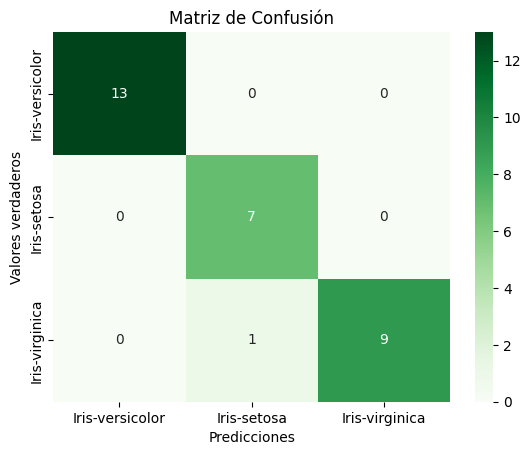

In [ ]:
conf_matrix_Bayern = confusion_matrix(y_test, y_predBayern)
sns.heatmap(conf_matrix_Bayern, annot=True, fmt="d", cmap="Greens")
class_names=['Iris-versicolor','Iris-setosa','Iris-virginica']
tick_marks=[0.5,1.5,2.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

<h2>3. Análisis discriminante

Formula:
\begin{align}
δ_k(x) = x^T \sum^{-1}μ_k-\frac{1}{2}μ_k^T\sum^{-1}\mu_k + log(\pi_k)
\end{align}

Donde:
*   $δ_k(x)$ es el valor de la función discriminante lineal para la clase $k$.
*   $x$ es el vector de características.
*   $\sum$ es la matriz de covarianza común entre las clases.
*   $\mu_k$ es el vector de media de la clase $k$
*   $\pi_k$ es la probabilidad a priori de la clase $k$

In [ ]:
adl_model=LinearDiscriminantAnalysis()
adl_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_Ad=adl_model.predict(X_test)
print(y_pred_Ad)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [ ]:
tablaAnDisc=pd.DataFrame({'Real':y_test,'Prediccion':y_pred_Ad,'Acerto':y_test==y_pred_Ad})
tablaAnDisc

,Real,Prediccion,Acerto
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-virginica,Iris-virginica,True
3,Iris-setosa,Iris-setosa,True
4,Iris-versicolor,Iris-versicolor,True
5,Iris-virginica,Iris-virginica,True
6,Iris-virginica,Iris-virginica,True
7,Iris-setosa,Iris-setosa,True
8,Iris-setosa,Iris-setosa,True
9,Iris-versicolor,Iris-versicolor,True


In [ ]:
print('Precisión Analisis discriminante: {}'.format(adl_model.score(X_train, y_train)))

Precisión Analisis discriminante: 0.975


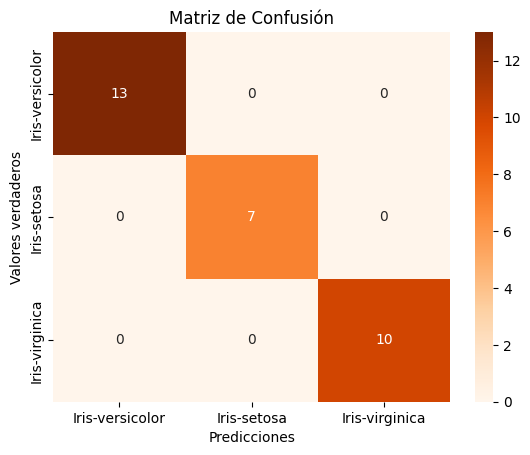

In [ ]:
conf_matrix_AnD = confusion_matrix(y_test, y_pred_Ad)
sns.heatmap(conf_matrix_AnD, annot=True, fmt="d", cmap="Oranges")
class_names=['Iris-versicolor','Iris-setosa','Iris-virginica']
tick_marks=[0.5,1.5,2.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

Revisando la precisión obtenida con diferentes semillas en los datos se noto que el modelo que cuenta con la mejor presición fue el metodo de análisis discriminante, esto podría deberse a que el análisis discriminante es efectivo cuando las clases están bien separadas y las suposiciones del método se ajustan a los datos. Además, el análisis discriminante busca directamente maximizar la separación entre clases, lo que puede llevar a una mejor precisión.